In [42]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import numpy as np
import pytz
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
plt.style.use('_mpl-gallery')

In [43]:
# daylightStart = datetime.datetime(2023,4,21,5,0,0,0,tzinfo=pytz.timezone('UTC'))
# daylightEnd = datetime.datetime(2023,4,21,19,0,0,0,tzinfo=pytz.timezone('UTC'))

In [44]:
# Group 1

group1Participants = [10,11,12,13] 
startAnnotation = datetime.datetime(2023,3,30,0,0,0,0,tzinfo=pytz.timezone('UTC'))
startCoordination = datetime.datetime(2023,4,21,0,0,0,0,tzinfo=pytz.timezone('UTC'))

bookings = pd.read_json("../ec_data/all_bookingsFINAL.json")

bookings = pd.DataFrame(bookings.fields.values.tolist())

bookings['start'] = pd.to_datetime(bookings['start'],infer_datetime_format=True)
bookings['created_at'] = pd.to_datetime(bookings['created_at'],infer_datetime_format=True)
bookings['modified_at'] = pd.to_datetime(bookings['modified_at'],infer_datetime_format=True)

g1Bookings = bookings.loc[bookings['user'].isin(group1Participants)] 
g1Bookings = g1Bookings.loc[g1Bookings['start']>= startCoordination ] 
# g1Bookings

In [45]:

group_one_consumption = pd.read_json("../ec_data/consumption/group_one/all_group.json")
consumption102Sara = pd.read_json("../ec_data/consumption/group_one/sensor102_sara.json")
consumption103Julie = pd.read_json("../ec_data/consumption/group_one/sensor103_julie.json")
consumption106Sian = pd.read_json("../ec_data/consumption/group_one/sensor106_sian.json")
consumption105Pete = pd.read_json("../ec_data/consumption/group_one/sensor105_pete.json")

group_one_consumption = group_one_consumption["readings"][0]
consumption102Sara = consumption102Sara["readings"][0]
consumption103Julie = consumption103Julie["readings"][0]
consumption106Sian = consumption106Sian["readings"][0]
consumption105Pete = consumption105Pete["readings"][0]

group_one_consumption = pd.DataFrame.from_dict(group_one_consumption, orient='columns')
consumption102Sara = pd.DataFrame.from_dict(consumption102Sara, orient='columns')
consumption103Julie = pd.DataFrame.from_dict(consumption103Julie, orient='columns')
consumption106Sian = pd.DataFrame.from_dict(consumption106Sian, orient='columns')
consumption105Pete = pd.DataFrame.from_dict(consumption105Pete, orient='columns')

group_one_consumption['time'] = pd.to_datetime(group_one_consumption['time'],infer_datetime_format=True)
consumption102Sara['time'] = pd.to_datetime(consumption102Sara['time'],infer_datetime_format=True)
consumption103Julie['time'] = pd.to_datetime(consumption103Julie['time'],infer_datetime_format=True)
consumption106Sian['time'] = pd.to_datetime(consumption106Sian['time'],infer_datetime_format=True)
consumption105Pete['time'] = pd.to_datetime(consumption105Pete['time'],infer_datetime_format=True)

group_one_consumption['value'] = group_one_consumption['value']*0.23*0.64*0.9
consumption102Sara['value'] = consumption102Sara['value']*0.23*0.64*0.9
consumption103Julie['value'] = consumption103Julie['value']*0.23*0.64*0.9
consumption106Sian['value'] = consumption106Sian['value']*0.23*0.64*0.9
consumption105Pete['value'] = consumption105Pete['value']*0.23*0.64*0.9

group_one_consumption_coordination = group_one_consumption[ group_one_consumption['time'] > startCoordination ]
consumption102Sara_coordination = consumption102Sara[ consumption102Sara['time'] > startCoordination ]
consumption103Julie_coordination = consumption103Julie[ consumption103Julie['time'] > startCoordination ]
consumption106Sian_coordination = consumption106Sian[ consumption106Sian['time'] > startCoordination ]
consumption105Pete_coordination = consumption105Pete[ consumption105Pete['time'] > startCoordination ]


In [6]:
# Filter out non-daylight hours
tmp1 = group_one_consumption_coordination[group_one_consumption_coordination['time'].dt.hour > daylightStart.hour] 
group_consumption_coordination = tmp1[tmp1['time'].dt.hour < daylightEnd.hour]

tmp1 = consumption102Sara_coordination[consumption102Sara_coordination['time'].dt.hour > daylightStart.hour] 
consumption102Sara_coordination = tmp1[tmp1['time'].dt.hour < daylightEnd.hour]

tmp1 = consumption103Julie_coordination[consumption103Julie_coordination['time'].dt.hour > daylightStart.hour] 
consumption103Julie_coordination = tmp1[tmp1['time'].dt.hour < daylightEnd.hour]

tmp1 = consumption106Sian_coordination[consumption106Sian_coordination['time'].dt.hour > daylightStart.hour] 
consumption106Sian_coordination = tmp1[tmp1['time'].dt.hour < daylightEnd.hour]

tmp1 = consumption105Pete_coordination[consumption105Pete_coordination['time'].dt.hour > daylightStart.hour] 
consumption105Pete_coordination = tmp1[tmp1['time'].dt.hour < daylightEnd.hour]


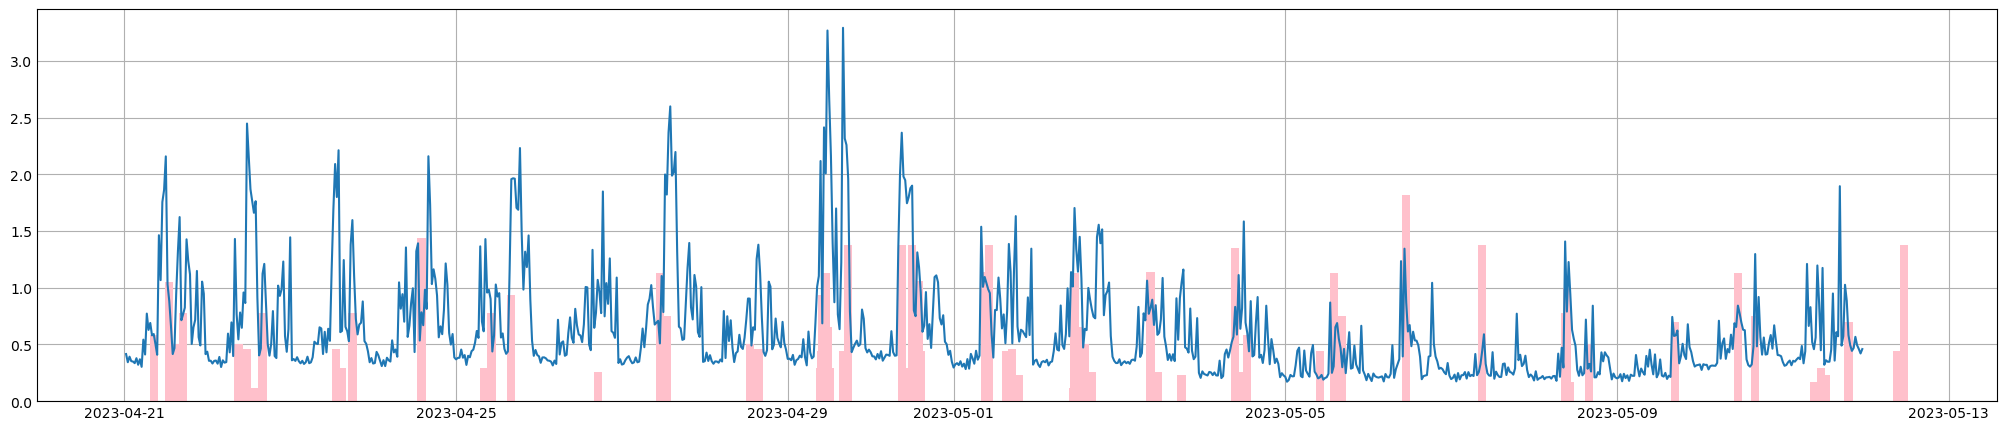

In [46]:
g1Bookings.sort_values(by='start')
# plt.figure(1, figsize=(20, 4)) # Figure size in inches (size_x, size_y)
fig1, ax = plt.subplots( figsize=(20, 4))
ax.bar(g1Bookings['start'],g1Bookings['consumption'],color='pink',width=0.1)
ax.plot(group_one_consumption_coordination['time'],group_one_consumption_coordination['value'])
plt.show()

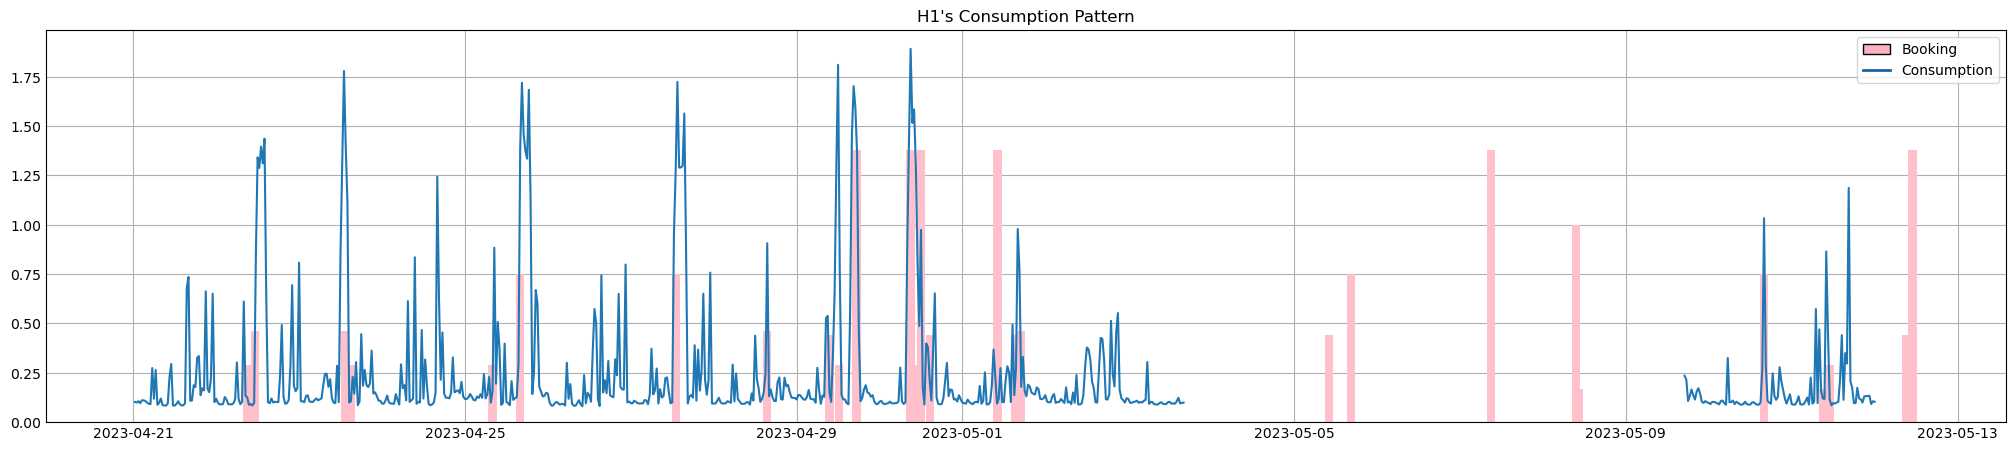

In [47]:
g1Bookings = g1Bookings.sort_values(by='start')
bookings102Sara = g1Bookings.loc[g1Bookings['user']==11] 
fig1, ax = plt.subplots(figsize=(20, 4))
ax.bar(bookings102Sara['start'],bookings102Sara['consumption'],color='pink',width=0.1)
ax.plot(consumption102Sara_coordination['time'],consumption102Sara_coordination['value'])

ax.set_title("H1's Consumption Pattern")
handles = [Rectangle((0, 0), 1, 1, color="#fdb0bf", ec="k"),
           Line2D([0, 1], [0.5, 0.5], color="#1b62a5", lw=2)]
labels = ["Booking", "Consumption"]
plt.legend(handles, labels)

plt.savefig('H1_consumption.png', dpi=300, bbox_inches='tight')
plt.show()

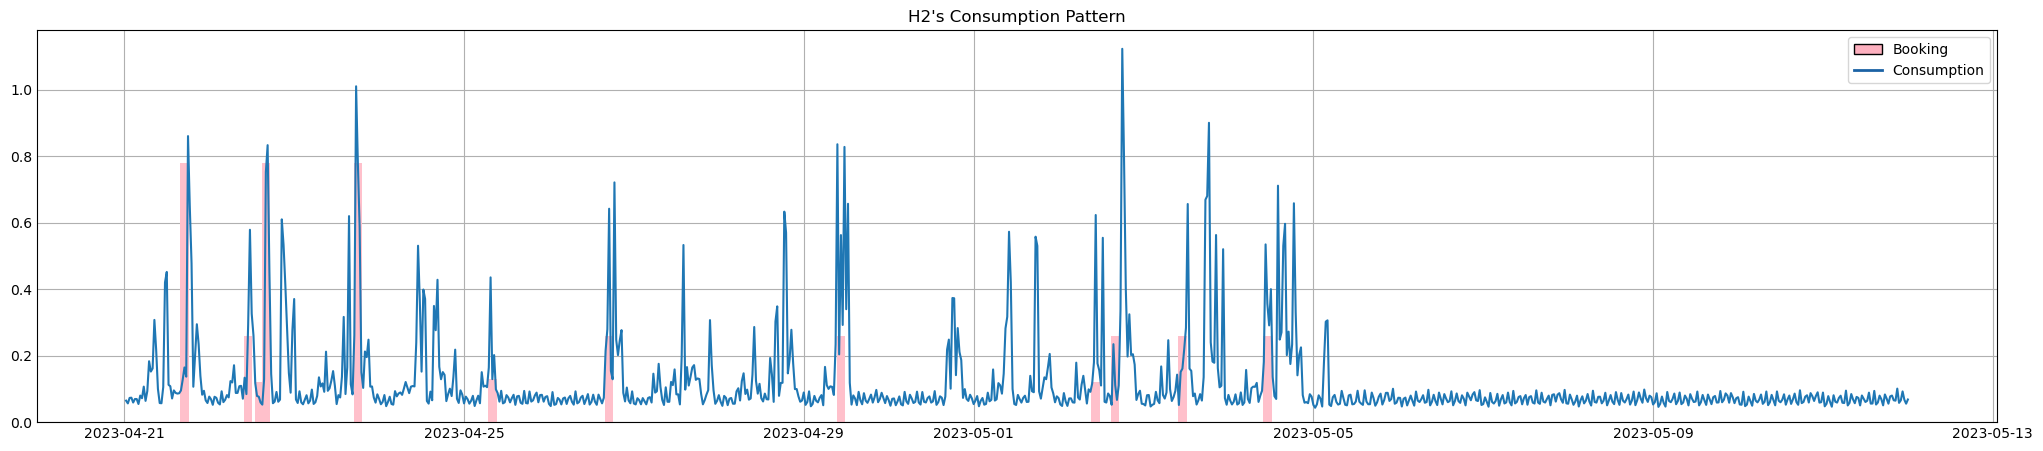

In [48]:
bookings103Julie = g1Bookings.loc[g1Bookings['user']==12]

fig1, ax = plt.subplots( figsize=(20, 4))
ax.bar(bookings103Julie['start'],bookings103Julie['consumption'],color='pink',width=0.1)
ax.plot(consumption103Julie_coordination['time'],consumption103Julie_coordination['value'])

ax.set_title("H2's Consumption Pattern")
handles = [Rectangle((0, 0), 1, 1, color="#fdb0bf", ec="k"),
           Line2D([0, 1], [0.5, 0.5], color="#1b62a5", lw=2)]
labels = ["Booking", "Consumption"]
plt.legend(handles, labels)

plt.savefig('H2_consumption.png', dpi=300, bbox_inches='tight')
plt.show()

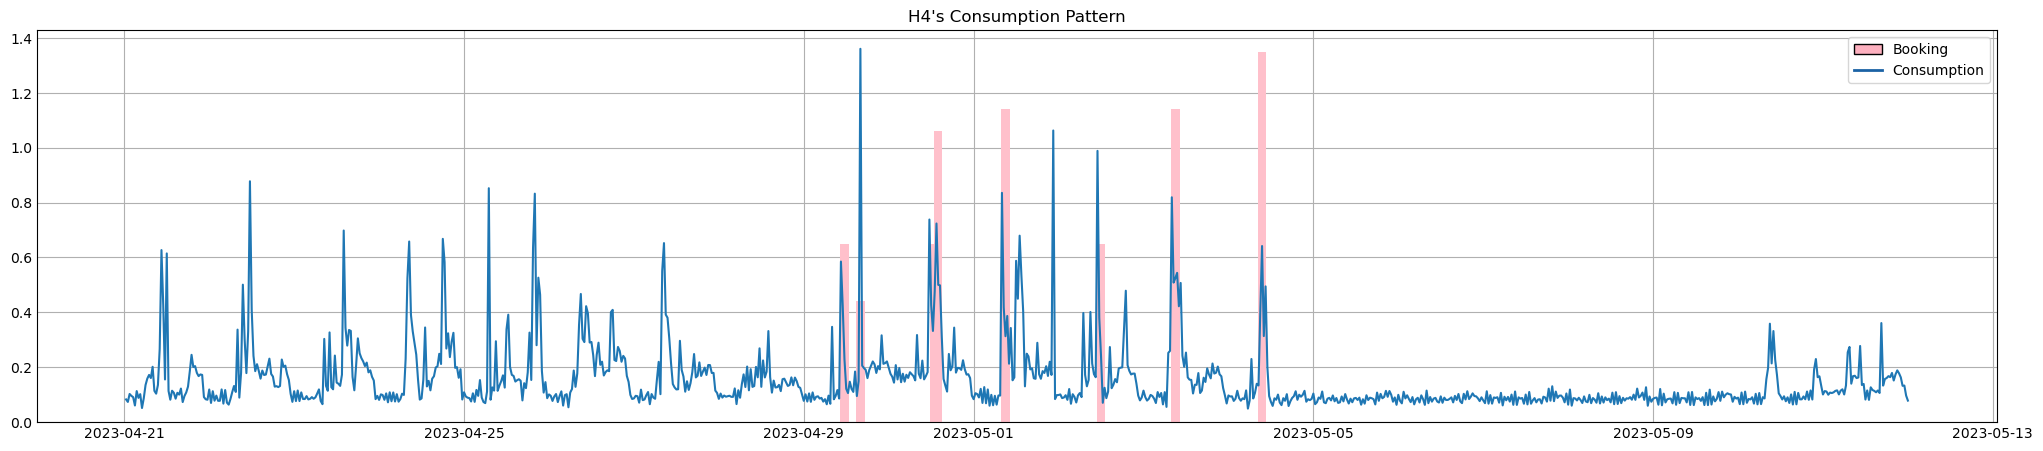

In [49]:
bookings106Sian = g1Bookings.loc[g1Bookings['user']==13]
fig1, ax = plt.subplots( figsize=(20, 4))
ax.bar(bookings106Sian['start'],bookings106Sian['consumption'],color='pink',width=0.1)
plt.plot(consumption106Sian_coordination['time'],consumption106Sian_coordination['value'])

ax.set_title("H4's Consumption Pattern")
handles = [Rectangle((0, 0), 1, 1, color="#fdb0bf", ec="k"),
           Line2D([0, 1], [0.5, 0.5], color="#1b62a5", lw=2)]
labels = ["Booking", "Consumption"]
plt.legend(handles, labels)

plt.savefig('H4_consumption.png', dpi=300, bbox_inches='tight')
plt.show()

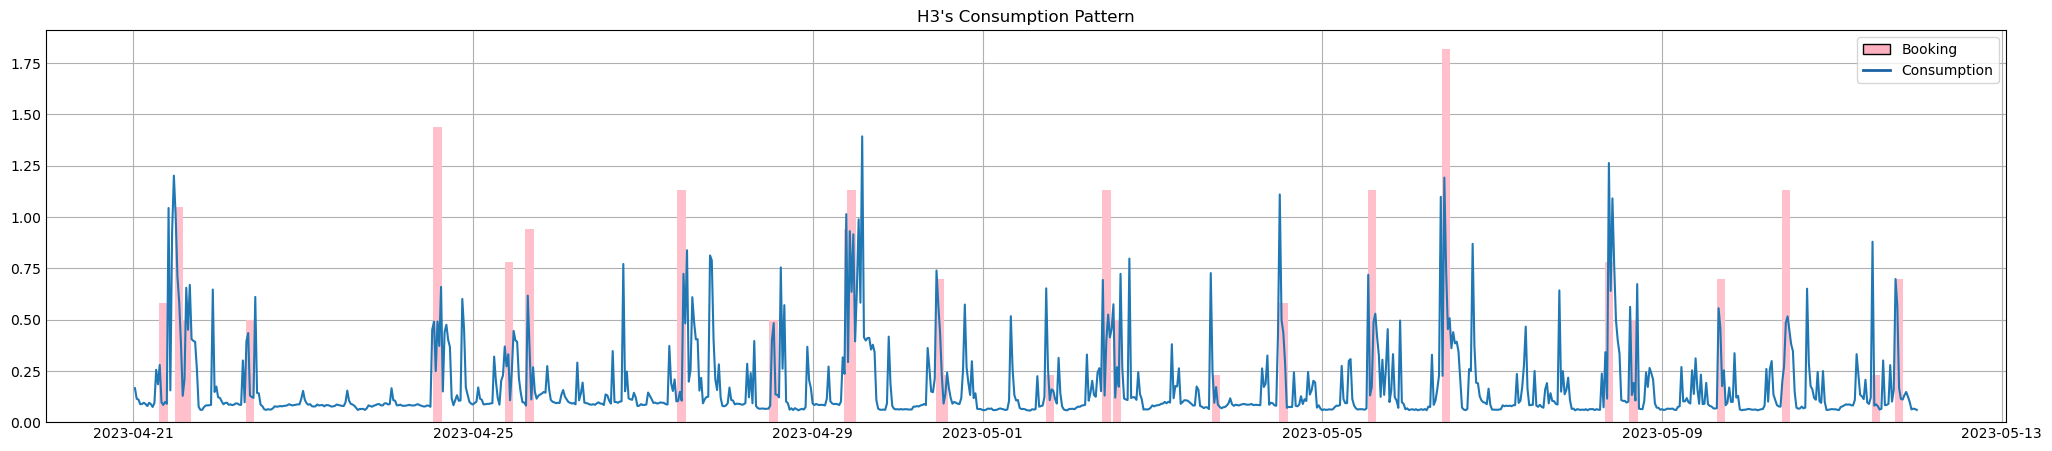

In [50]:
bookings105Pete = g1Bookings.loc[g1Bookings['user']==10]
fig1, ax = plt.subplots( figsize=(20, 4))

plt.figure(1, figsize=(20, 4)) # Figure size in inches (size_x, size_y)
ax.bar(bookings105Pete['start'],bookings105Pete['consumption'],color='pink',width=0.1)
plt.plot(consumption105Pete_coordination['time'],consumption105Pete_coordination['value'])

ax.set_title("H3's Consumption Pattern")
handles = [Rectangle((0, 0), 1, 1, color="#fdb0bf", ec="k"),
           Line2D([0, 1], [0.5, 0.5], color="#1b62a5", lw=2)]
labels = ["Booking", "Consumption"]
plt.legend(handles, labels)

plt.savefig('H3_consumption.png', dpi=300, bbox_inches='tight')
plt.show()

In [51]:
# Group 2

group2Participants = [15,16,17,18] 
startCoordination = datetime.datetime(2023,6,5,0,0,0,0,tzinfo=pytz.timezone('UTC'))

bookings = pd.read_json("../ec_data/all_bookingsFINAL.json")

bookings = pd.DataFrame(bookings.fields.values.tolist())

bookings['start'] = pd.to_datetime(bookings['start'],infer_datetime_format=True)
bookings['created_at'] = pd.to_datetime(bookings['created_at'],infer_datetime_format=True)
bookings['modified_at'] = pd.to_datetime(bookings['modified_at'],infer_datetime_format=True)

g2Bookings = bookings.loc[bookings['user'].isin(group2Participants)] 
g2Bookings = g2Bookings.loc[g2Bookings['start']>= startCoordination ] 
# g2Bookings

In [52]:

group_two_consumption = pd.read_json("../ec_data/consumption/group_two/all_group.json")
consumption103Jo = pd.read_json("../ec_data/consumption/group_two/sensor103_Jo.json")
consumption105James = pd.read_json("../ec_data/consumption/group_two/sensor105_James.json")
consumption106Tim = pd.read_json("../ec_data/consumption/group_two/sensor106_Tim.json")
consumption110Helen = pd.read_json("../ec_data/consumption/group_two/sensor110_Helen.json")

group_two_consumption = group_two_consumption["readings"][0]
consumption103Jo = consumption103Jo["readings"][0]
consumption105James = consumption105James["readings"][0]
consumption106Tim = consumption106Tim["readings"][0]
consumption110Helen = consumption110Helen["readings"][0]

group_two_consumption = pd.DataFrame.from_dict(group_two_consumption, orient='columns')
consumption103Jo = pd.DataFrame.from_dict(consumption103Jo, orient='columns')
consumption105James = pd.DataFrame.from_dict(consumption105James, orient='columns')
consumption106Tim = pd.DataFrame.from_dict(consumption106Tim, orient='columns')
consumption110Helen = pd.DataFrame.from_dict(consumption110Helen, orient='columns')

group_two_consumption['time'] = pd.to_datetime(group_two_consumption['time'],infer_datetime_format=True)
consumption103Jo['time'] = pd.to_datetime(consumption103Jo['time'],infer_datetime_format=True)
consumption105James['time'] = pd.to_datetime(consumption105James['time'],infer_datetime_format=True)
consumption106Tim['time'] = pd.to_datetime(consumption106Tim['time'],infer_datetime_format=True)
consumption110Helen['time'] = pd.to_datetime(consumption110Helen['time'],infer_datetime_format=True)

group_two_consumption['value'] = group_two_consumption['value']*0.23*0.64*0.9
consumption103Jo['value'] = consumption103Jo['value']*0.23*0.64*0.9
consumption105James['value'] = consumption105James['value']*0.23*0.64*0.9
consumption106Tim['value'] = consumption106Tim['value']*0.23*0.64*0.9
consumption110Helen['value'] = consumption110Helen['value']*0.23*0.64*0.9


group_two_consumption_coordination = group_two_consumption[ group_two_consumption['time'] > startCoordination ]
consumption103Jo_coordination = consumption103Jo[ consumption103Jo['time'] > startCoordination ]
consumption105James_coordination = consumption105James[ consumption105James['time'] > startCoordination ]
consumption106Tim_coordination = consumption106Tim[ consumption106Tim['time'] > startCoordination ]
consumption110Helen_coordination = consumption110Helen[ consumption110Helen['time'] > startCoordination ]


In [12]:
# Filter out non-daylight hours
tmp1 = group_two_consumption_coordination[group_two_consumption_coordination['time'].dt.hour > daylightStart.hour] 
group_two_consumption_coordination = tmp1[tmp1['time'].dt.hour < daylightEnd.hour]

tmp1 = consumption103Jo_coordination[consumption103Jo_coordination['time'].dt.hour > daylightStart.hour] 
consumption103Jo_coordination = tmp1[tmp1['time'].dt.hour < daylightEnd.hour]

tmp1 = consumption105James_coordination[consumption105James_coordination['time'].dt.hour > daylightStart.hour] 
consumption105James_coordination = tmp1[tmp1['time'].dt.hour < daylightEnd.hour]

tmp1 = consumption106Tim_coordination[consumption106Tim_coordination['time'].dt.hour > daylightStart.hour] 
consumption106Tim_coordination = tmp1[tmp1['time'].dt.hour < daylightEnd.hour]

tmp1 = consumption110Helen_coordination[consumption110Helen_coordination['time'].dt.hour > daylightStart.hour] 
consumption110Helen_coordination = tmp1[tmp1['time'].dt.hour < daylightEnd.hour]


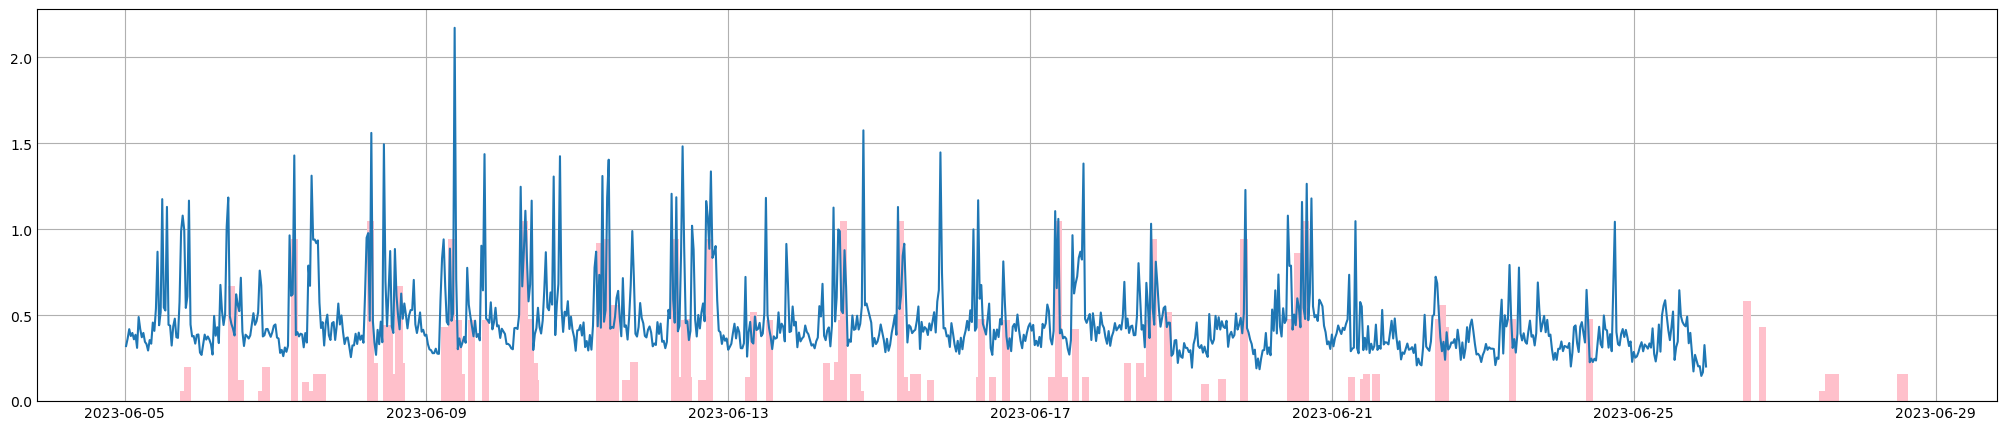

In [53]:
g2Bookings.sort_values(by='start')
# plt.figure(1, figsize=(20, 4)) # Figure size in inches (size_x, size_y)
fig1, ax = plt.subplots( figsize=(20, 4))
ax.bar(g2Bookings['start'],g2Bookings['consumption'],color='pink',width=0.1)
ax.plot(group_two_consumption_coordination['time'],group_two_consumption_coordination['value'])
plt.show()

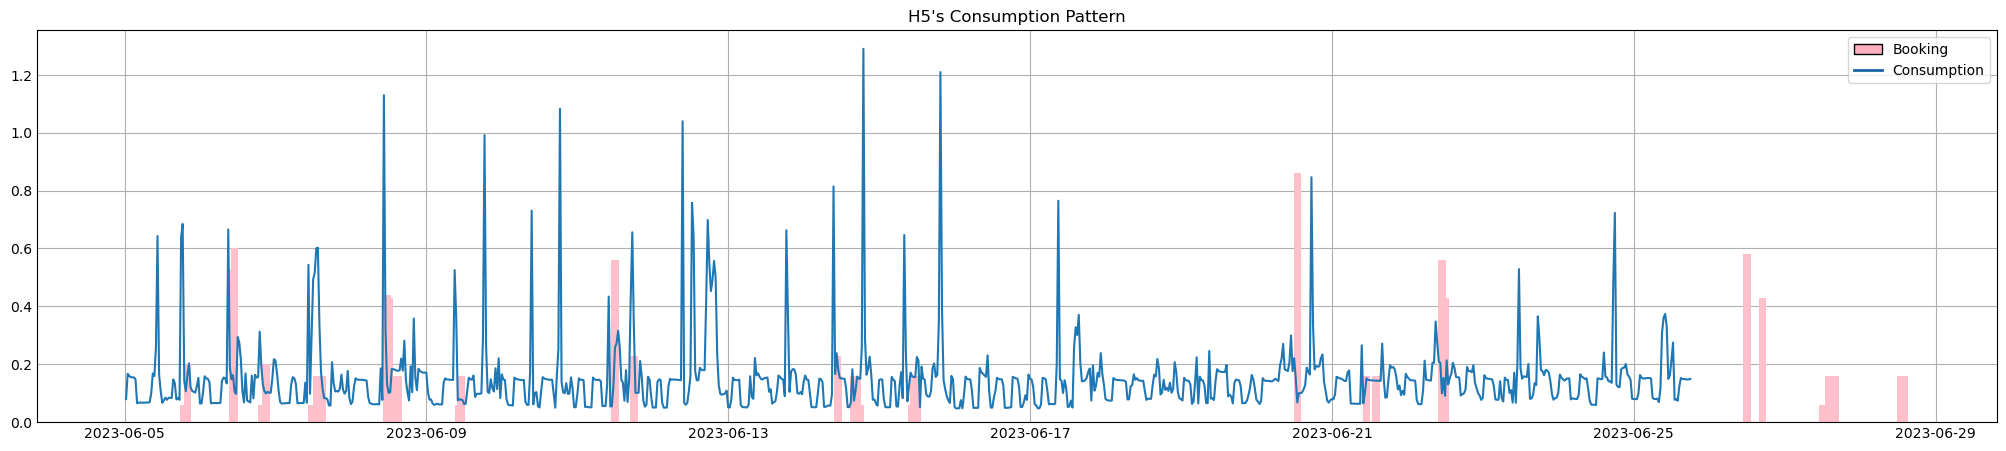

In [54]:
g2Bookings = g2Bookings.sort_values(by='start')
bookings103Jo = g2Bookings.loc[g2Bookings['user']==17] 
fig1, ax = plt.subplots( figsize=(20, 4))
ax.bar(bookings103Jo['start'],bookings103Jo['consumption'],color='pink',width=0.1)
ax.plot(consumption103Jo_coordination['time'],consumption103Jo_coordination['value'])

ax.set_title("H5's Consumption Pattern")
handles = [Rectangle((0, 0), 1, 1, color="#fdb0bf", ec="k"),
           Line2D([0, 1], [0.5, 0.5], color="#1b62a5", lw=2)]
labels = ["Booking", "Consumption"]
plt.legend(handles, labels)

plt.savefig('H5_consumption.png', dpi=300, bbox_inches='tight')
plt.show()

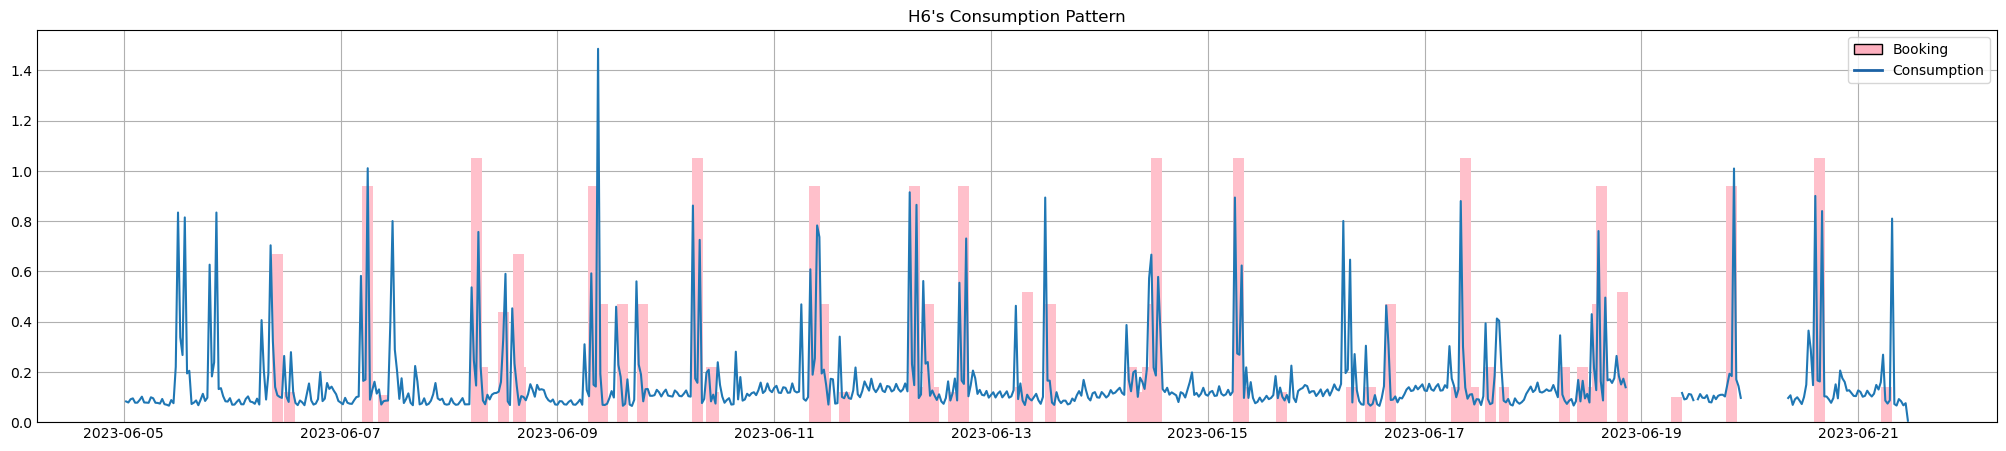

In [55]:
g2Bookings = g2Bookings.sort_values(by='start')
bookings105James = g2Bookings.loc[g2Bookings['user']==16] 
fig1, ax = plt.subplots( figsize=(20, 4))
ax.bar(bookings105James['start'],bookings105James['consumption'],color='pink',width=0.1)
ax.plot(consumption105James_coordination['time'],consumption105James_coordination['value'])

ax.set_title("H6's Consumption Pattern")
handles = [Rectangle((0, 0), 1, 1, color="#fdb0bf", ec="k"),
           Line2D([0, 1], [0.5, 0.5], color="#1b62a5", lw=2)]
labels = ["Booking", "Consumption"]
plt.legend(handles, labels)

plt.savefig('H6_consumption.png', dpi=300, bbox_inches='tight')
plt.show()

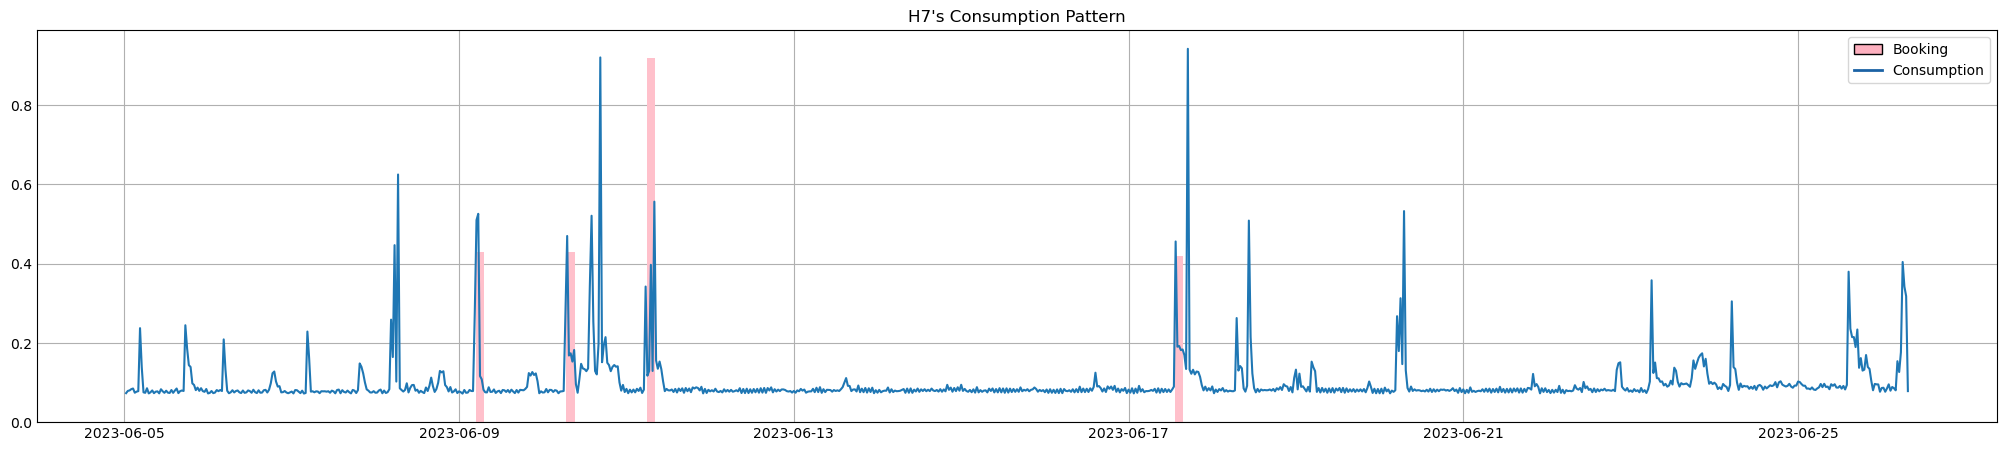

In [56]:
g2Bookings = g2Bookings.sort_values(by='start')
bookings106Tim = g2Bookings.loc[g2Bookings['user']==18] 
fig1, ax = plt.subplots( figsize=(20, 4))
# selected_bookings = bookings106Tim
# selected_consumption = consumption106Tim_coordination
# selected_bookings = bookings106Tim[200:400]
# selected_consumption = consumption106Tim_coordination[600:800]
ax.bar(bookings106Tim['start'],bookings106Tim['consumption'],color='pink',width=0.1)
ax.plot(consumption106Tim_coordination['time'],consumption106Tim_coordination['value'])

ax.set_title("H7's Consumption Pattern")
handles = [Rectangle((0, 0), 1, 1, color="#fdb0bf", ec="k"),
           Line2D([0, 1], [0.5, 0.5], color="#1b62a5", lw=2)]
labels = ["Booking", "Consumption"]
plt.legend(handles, labels)

plt.savefig('H7_consumption.png', dpi=300, bbox_inches='tight')
plt.show()

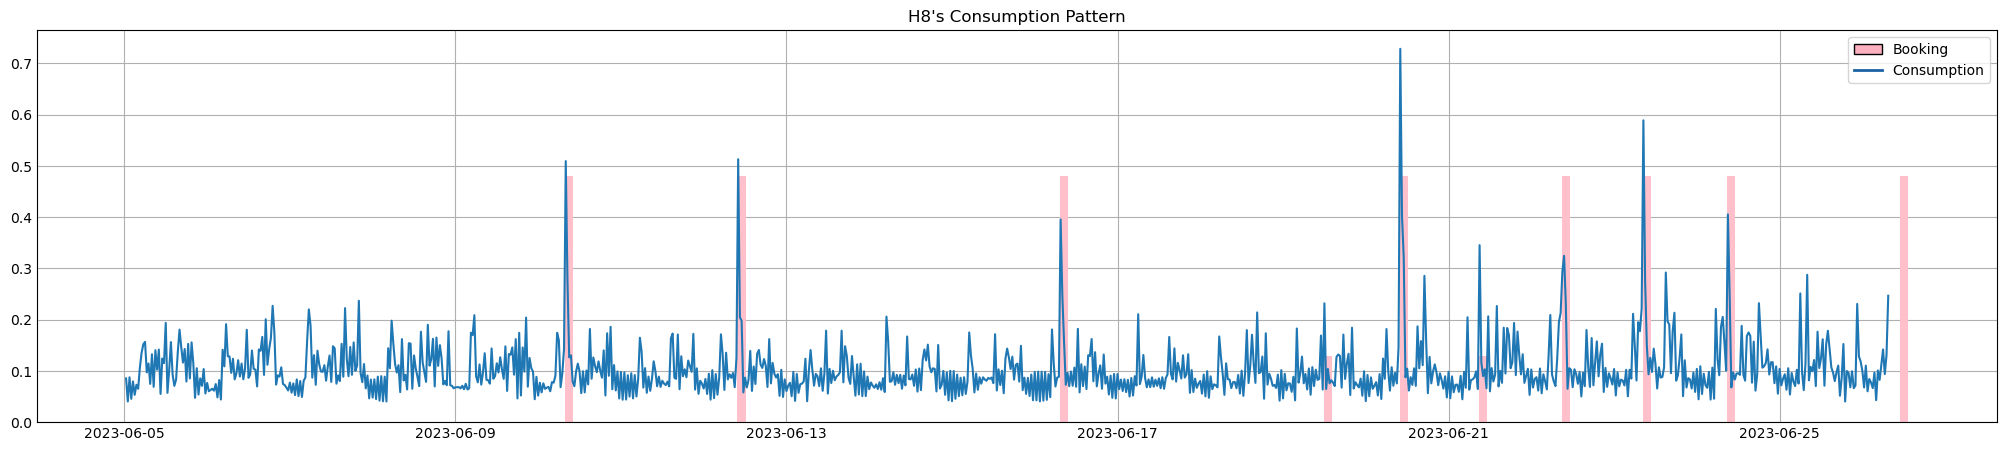

In [57]:
g2Bookings = g2Bookings.sort_values(by='start')
bookings110Helen = g2Bookings.loc[g2Bookings['user']==15] 
fig1, ax = plt.subplots( figsize=(20, 4))
ax.bar(bookings110Helen['start'],bookings110Helen['consumption'],color='pink',width=0.1)
ax.plot(consumption110Helen_coordination['time'],consumption110Helen_coordination['value'])

ax.set_title("H8's Consumption Pattern")
handles = [Rectangle((0, 0), 1, 1, color="#fdb0bf", ec="k"),
           Line2D([0, 1], [0.5, 0.5], color="#1b62a5", lw=2)]
labels = ["Booking", "Consumption"]
plt.legend(handles, labels)

plt.savefig('H8_consumption.png', dpi=300, bbox_inches='tight')
plt.show()

In [58]:
# Group 3

group3Participants = [19,20,21] 
startCoordination = datetime.datetime(2023,6,19,0,0,0,0,tzinfo=pytz.timezone('UTC'))

g3Bookings = bookings.loc[bookings['user'].isin(group3Participants)] 
g3Bookings = g3Bookings.loc[g3Bookings['start']>= startCoordination ] 
# g3Bookings

In [59]:

# group_three_consumption = pd.read_json("../ec_data/consumption/group_three/all_group.json")
consumption112Zoe = pd.read_json("../ec_data/consumption/group_three/sensor_112_zoe.json")
consumption114Sajjad = pd.read_json("../ec_data/consumption/group_three/sensor_114_sajjad.json")
consumption98SaraB = pd.read_json("../ec_data/consumption/group_three/sensor_98_sarab.json")

# group_three_consumption = group_three_consumption["readings"][0]
consumption112Zoe = consumption112Zoe["readings"][0]
consumption114Sajjad = consumption114Sajjad["readings"][0]
consumption98SaraB = consumption98SaraB["readings"][0]

# group_three_consumption = pd.DataFrame.from_dict(group_three_consumption, orient='columns')
consumption112Zoe = pd.DataFrame.from_dict(consumption112Zoe, orient='columns')
consumption114Sajjad = pd.DataFrame.from_dict(consumption114Sajjad, orient='columns')
consumption98SaraB = pd.DataFrame.from_dict(consumption98SaraB, orient='columns')

# group_three_consumption['time'] = pd.to_datetime(group_three_consumption['time'],infer_datetime_format=True)
consumption112Zoe['time'] = pd.to_datetime(consumption112Zoe['time'],infer_datetime_format=True)
consumption114Sajjad['time'] = pd.to_datetime(consumption114Sajjad['time'],infer_datetime_format=True)
consumption98SaraB['time'] = pd.to_datetime(consumption98SaraB['time'],infer_datetime_format=True)

# group_three_consumption['value'] = group_three_consumption['value']*0.23*0.64*0.9
consumption112Zoe['value'] = consumption112Zoe['value']*0.23*0.64*0.9
consumption114Sajjad['value'] = consumption114Sajjad['value']*0.23*0.64*0.9
consumption98SaraB['value'] = consumption98SaraB['value']*0.23*0.64*0.9


# group_three_consumption_coordination = group_three_consumption[ group_three_consumption['time'] > startCoordination ]
consumption112Zoe_coordination = consumption112Zoe[ consumption112Zoe['time'] > startCoordination ]
consumption114Sajjad_coordination = consumption114Sajjad[ consumption114Sajjad['time'] > startCoordination ]
consumption98SaraB_coordination = consumption98SaraB[ consumption98SaraB['time'] > startCoordination ]


In [47]:
# Filter out non-daylight hours

# tmp1 = group_three_consumption_coordination[group_three_consumption_coordination['time'].dt.hour > daylightStart.hour] 
# group_three_consumption_coordination = tmp1[tmp1['time'].dt.hour < daylightEnd.hour]

tmp1 = consumption112Zoe_coordination[consumption112Zoe_coordination['time'].dt.hour > daylightStart.hour] 
consumption112Zoe_coordination = tmp1[tmp1['time'].dt.hour < daylightEnd.hour]

tmp1 = consumption114Sajjad_coordination[consumption114Sajjad_coordination['time'].dt.hour > daylightStart.hour] 
consumption114Sajjad_coordination = tmp1[tmp1['time'].dt.hour < daylightEnd.hour]

tmp1 = consumption98SaraB_coordination[consumption98SaraB_coordination['time'].dt.hour > daylightStart.hour] 
consumption98SaraB_coordination = tmp1[tmp1['time'].dt.hour < daylightEnd.hour]

In [ ]:
# g3Bookings.sort_values(by='start')
# plt.figure(1, figsize=(20, 4)) # Figure size in inches (size_x, size_y)
# fig1, ax = plt.subplots( figsize=(20, 4))
# ax.bar(g3Bookings['start'],g3Bookings['consumption'],color='pink',width=0.1)
# ax.plot(group_three_consumption_coordination['time'],group_three_consumption_coordination['value'])
# plt.show()

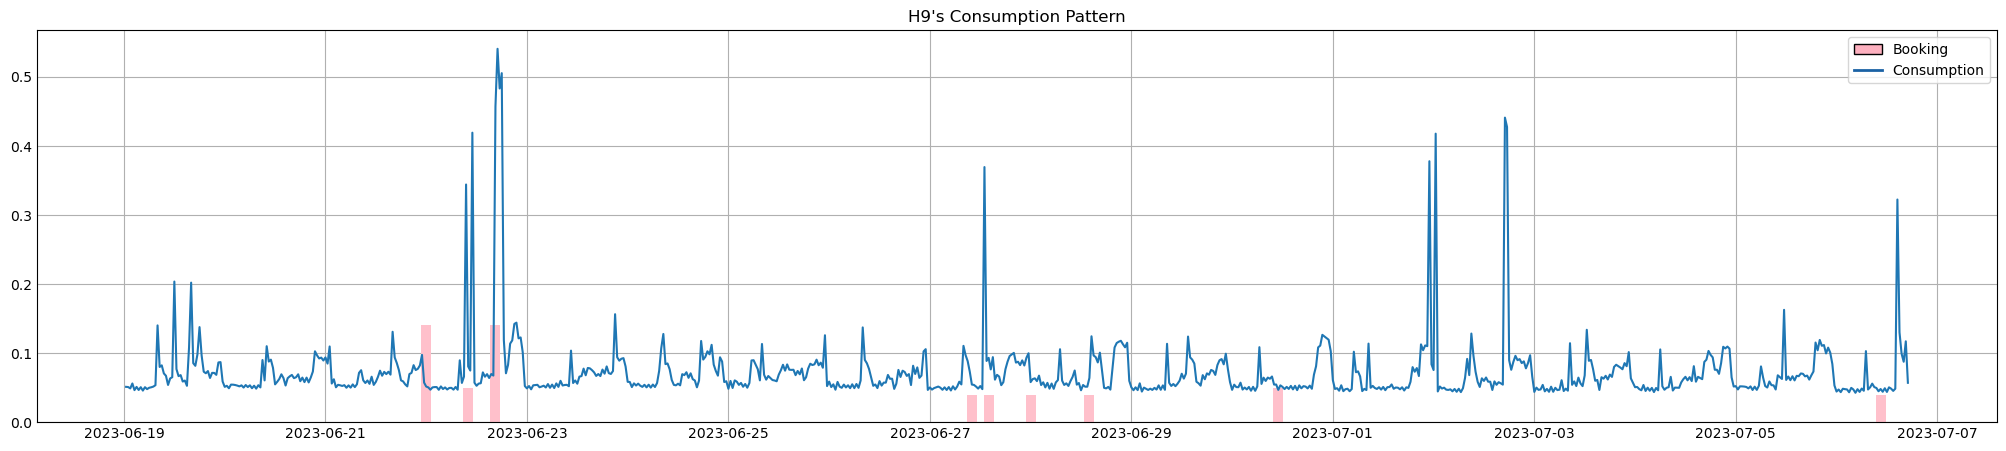

In [60]:
g3Bookings = g3Bookings.sort_values(by='start')
bookings112Zoe = g3Bookings.loc[g3Bookings['user']==19] 
fig1, ax = plt.subplots( figsize=(20, 4))
ax.bar(bookings112Zoe['start'],bookings112Zoe['consumption'],color='pink',width=0.1)
ax.plot(consumption112Zoe_coordination['time'],consumption112Zoe_coordination['value'])

ax.set_title("H9's Consumption Pattern")
handles = [Rectangle((0, 0), 1, 1, color="#fdb0bf", ec="k"),
           Line2D([0, 1], [0.5, 0.5], color="#1b62a5", lw=2)]
labels = ["Booking", "Consumption"]
plt.legend(handles, labels)

plt.savefig('H9_consumption.png', dpi=300, bbox_inches='tight')
plt.show()

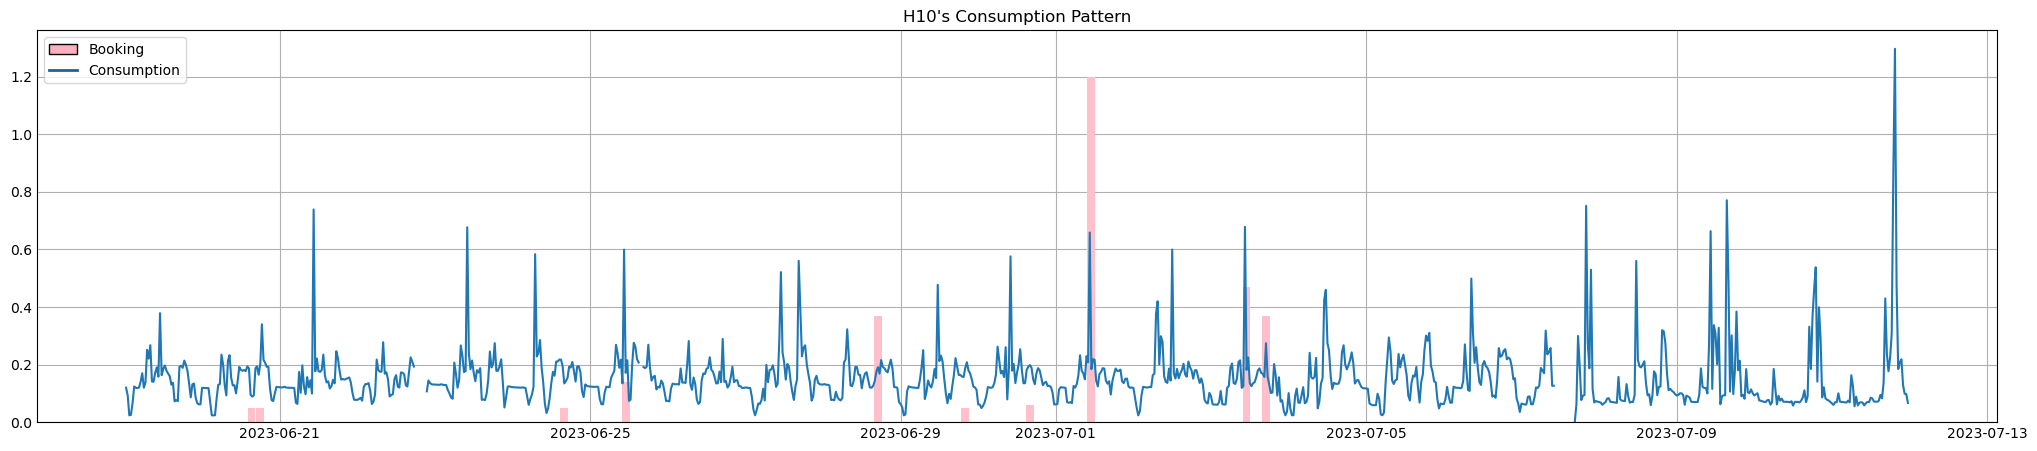

In [61]:
g3Bookings = g3Bookings.sort_values(by='start')
bookings114Sajjad = g3Bookings.loc[g3Bookings['user']==20] 
fig1, ax = plt.subplots( figsize=(20, 4))
ax.bar(bookings114Sajjad['start'],bookings114Sajjad['consumption'],color='pink',width=0.1)
ax.plot(consumption114Sajjad_coordination['time'],consumption114Sajjad_coordination['value'])

ax.set_title("H10's Consumption Pattern")
handles = [Rectangle((0, 0), 1, 1, color="#fdb0bf", ec="k"),
           Line2D([0, 1], [0.5, 0.5], color="#1b62a5", lw=2)]
labels = ["Booking", "Consumption"]
plt.legend(handles, labels)

plt.savefig('H10_consumption.png', dpi=300, bbox_inches='tight')
plt.show()

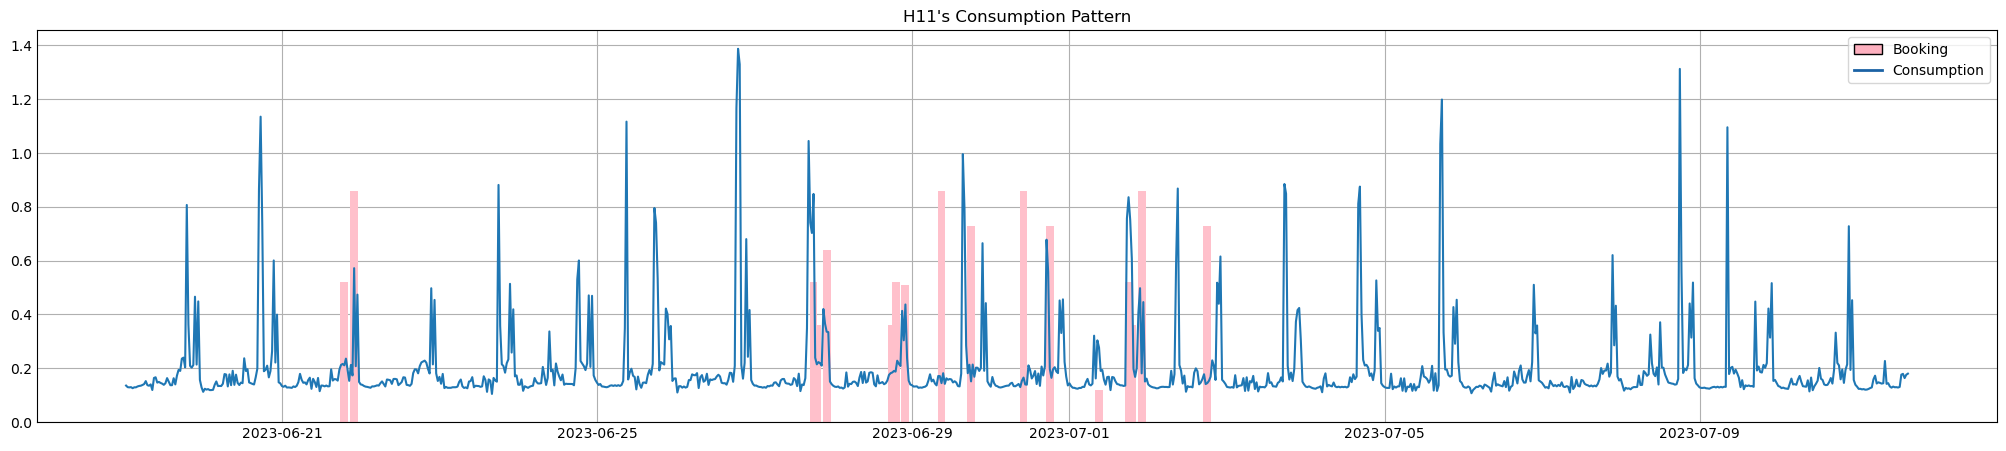

In [62]:
g3Bookings = g3Bookings.sort_values(by='start')
bookings98SaraB = g3Bookings.loc[g3Bookings['user']==21] 
fig1, ax = plt.subplots( figsize=(20, 4))
ax.bar(bookings98SaraB['start'],bookings98SaraB['consumption'],color='pink',width=0.1)
ax.plot(consumption98SaraB_coordination['time'],consumption98SaraB_coordination['value'])

ax.set_title("H11's Consumption Pattern")
handles = [Rectangle((0, 0), 1, 1, color="#fdb0bf", ec="k"),
           Line2D([0, 1], [0.5, 0.5], color="#1b62a5", lw=2)]
labels = ["Booking", "Consumption"]
plt.legend(handles, labels)

plt.savefig('H11_consumption.png', dpi=300, bbox_inches='tight')
plt.show()

In [63]:
# Group 4

group4Participants = [24,25,28] 
startCoordination = datetime.datetime(2023,7,8,0,0,0,0,tzinfo=pytz.timezone('UTC'))

g4Bookings = bookings.loc[bookings['user'].isin(group4Participants)] 
g4Bookings = g4Bookings.loc[g4Bookings['start']>= startCoordination ] 
# g4Bookings

In [64]:

# group_four_consumption = pd.read_json("../ec_data/consumption/group_four/all_group.json")
consumption100Tom = pd.read_json("../ec_data/consumption/group_four/sensor_100_tom.json")
consumption105Liz = pd.read_json("../ec_data/consumption/group_four/sensor_105_liz.json")
consumption114Zana = pd.read_json("../ec_data/consumption/group_four/sensor_114_zana.json")

# group_four_consumption = group_four_consumption["readings"][0]
consumption100Tom = consumption100Tom["readings"][0]
consumption105Liz = consumption105Liz["readings"][0]
consumption114Zana = consumption114Zana["readings"][0]

# group_four_consumption = pd.DataFrame.from_dict(group_four_consumption, orient='columns')
consumption100Tom = pd.DataFrame.from_dict(consumption100Tom, orient='columns')
consumption105Liz = pd.DataFrame.from_dict(consumption105Liz, orient='columns')
consumption114Zana = pd.DataFrame.from_dict(consumption114Zana, orient='columns')

# group_four_consumption['time'] = pd.to_datetime(group_four_consumption['time'],infer_datetime_format=True)
consumption100Tom['time'] = pd.to_datetime(consumption100Tom['time'],infer_datetime_format=True)
consumption105Liz['time'] = pd.to_datetime(consumption105Liz['time'],infer_datetime_format=True)
consumption114Zana['time'] = pd.to_datetime(consumption114Zana['time'],infer_datetime_format=True)

# group_four_consumption['value'] = group_four_consumption['value']*0.23*0.64*0.9
consumption100Tom['value'] = consumption100Tom['value']*0.23*0.64*0.9
consumption105Liz['value'] = consumption105Liz['value']*0.23*0.64*0.9
consumption114Zana['value'] = consumption114Zana['value']*0.23*0.64*0.9


# group_four_consumption_coordination = group_four_consumption[ group_four_consumption['time'] > startCoordination ]
consumption100Tom_coordination = consumption100Tom[ consumption100Tom['time'] > startCoordination ]
consumption105Liz_coordination = consumption105Liz[ consumption105Liz['time'] > startCoordination ]
consumption114Zana_coordination = consumption114Zana[ consumption114Zana['time'] > startCoordination ]


In [53]:
# Filter out non-daylight hours

# tmp1 = group_four_consumption_coordination[group_four_consumption_coordination['time'].dt.hour > daylightStart.hour] 
# group_four_consumption_coordination = tmp1[tmp1['time'].dt.hour < daylightEnd.hour]

tmp1 = consumption100Tom_coordination[consumption100Tom_coordination['time'].dt.hour > daylightStart.hour] 
consumption100Tom_coordination = tmp1[tmp1['time'].dt.hour < daylightEnd.hour]

tmp1 = consumption105Liz_coordination[consumption105Liz_coordination['time'].dt.hour > daylightStart.hour] 
consumption105Liz_coordination = tmp1[tmp1['time'].dt.hour < daylightEnd.hour]

tmp1 = consumption114Zana_coordination[consumption114Zana_coordination['time'].dt.hour > daylightStart.hour] 
consumption114Zana_coordination = tmp1[tmp1['time'].dt.hour < daylightEnd.hour]


In [ ]:
# g4Bookings.sort_values(by='start')
# plt.figure(1, figsize=(20, 4)) # Figure size in inches (size_x, size_y)
# fig1, ax = plt.subplots( figsize=(20, 4))
# ax.bar(g4Bookings['start'],g4Bookings['consumption'],color='pink',width=0.1)
# ax.plot(group_four_consumption_coordination['time'],group_four_consumption_coordination['value'])
# plt.show()

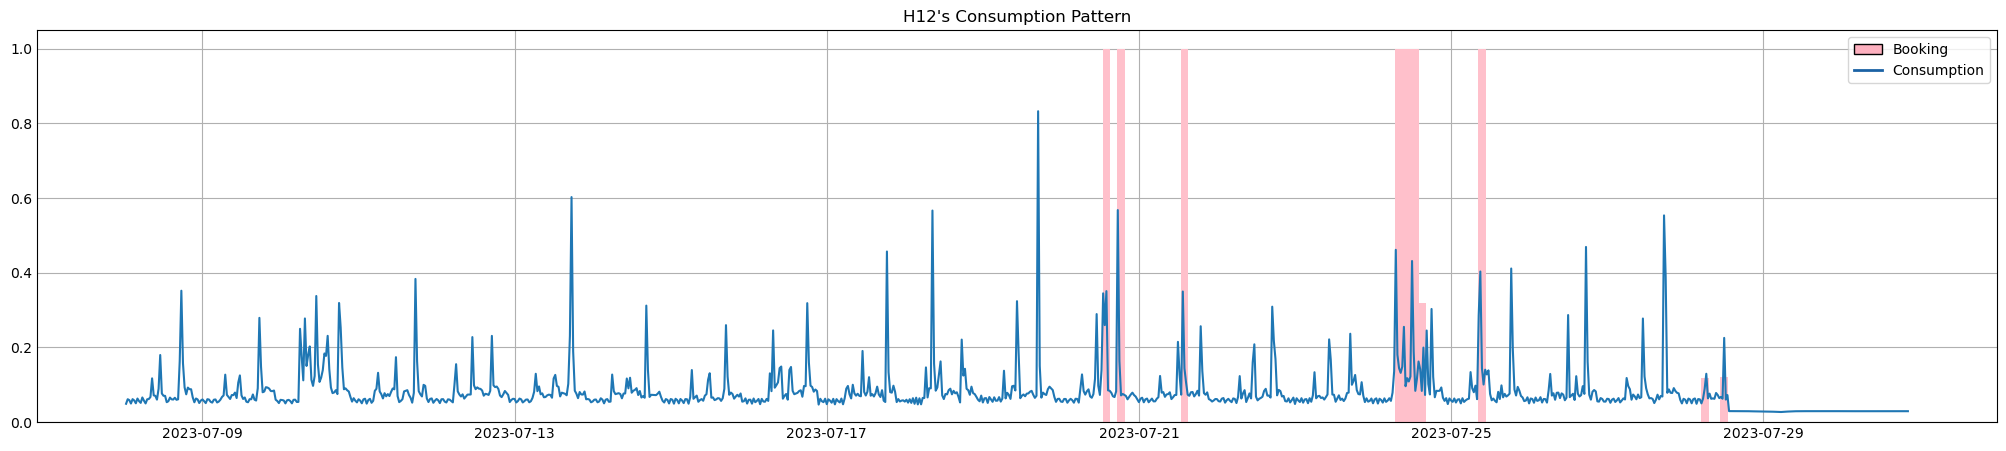

In [65]:
g4Bookings = g4Bookings.sort_values(by='start')
bookings100Tom = g4Bookings.loc[g4Bookings['user']==24] 
fig1, ax = plt.subplots( figsize=(20, 4))
ax.bar(bookings100Tom['start'],bookings100Tom['consumption'],color='pink',width=0.1)
ax.plot(consumption100Tom_coordination['time'],consumption100Tom_coordination['value'])

ax.set_title("H12's Consumption Pattern")
handles = [Rectangle((0, 0), 1, 1, color="#fdb0bf", ec="k"),
           Line2D([0, 1], [0.5, 0.5], color="#1b62a5", lw=2)]
labels = ["Booking", "Consumption"]
plt.legend(handles, labels)

plt.savefig('H12_consumption.png', dpi=300, bbox_inches='tight')
plt.show()

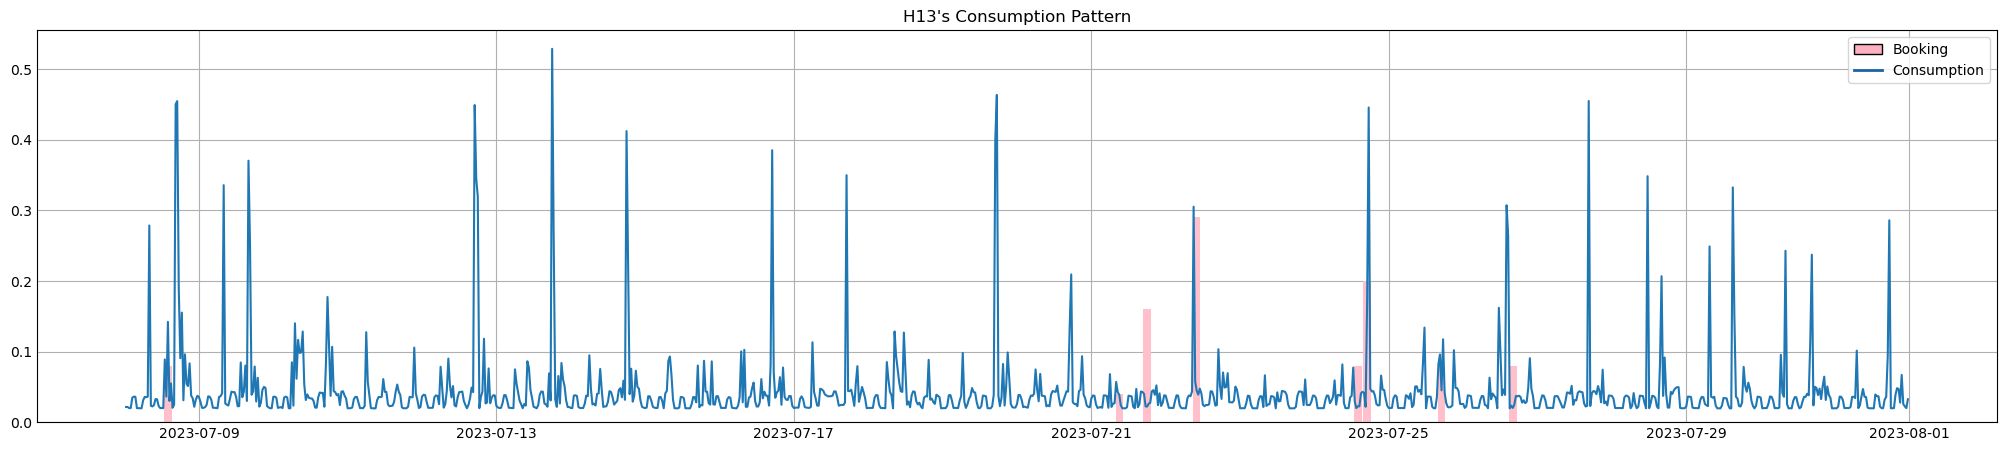

In [66]:
g4Bookings = g4Bookings.sort_values(by='start')
bookings105Liz = g4Bookings.loc[g4Bookings['user']==25] 
fig1, ax = plt.subplots( figsize=(20, 4))
ax.bar(bookings105Liz['start'],bookings105Liz['consumption'],color='pink',width=0.1)
ax.plot(consumption105Liz_coordination['time'],consumption105Liz_coordination['value'])

ax.set_title("H13's Consumption Pattern")
handles = [Rectangle((0, 0), 1, 1, color="#fdb0bf", ec="k"),
           Line2D([0, 1], [0.5, 0.5], color="#1b62a5", lw=2)]
labels = ["Booking", "Consumption"]
plt.legend(handles, labels)

plt.savefig('H13_consumption.png', dpi=300, bbox_inches='tight')
plt.show()

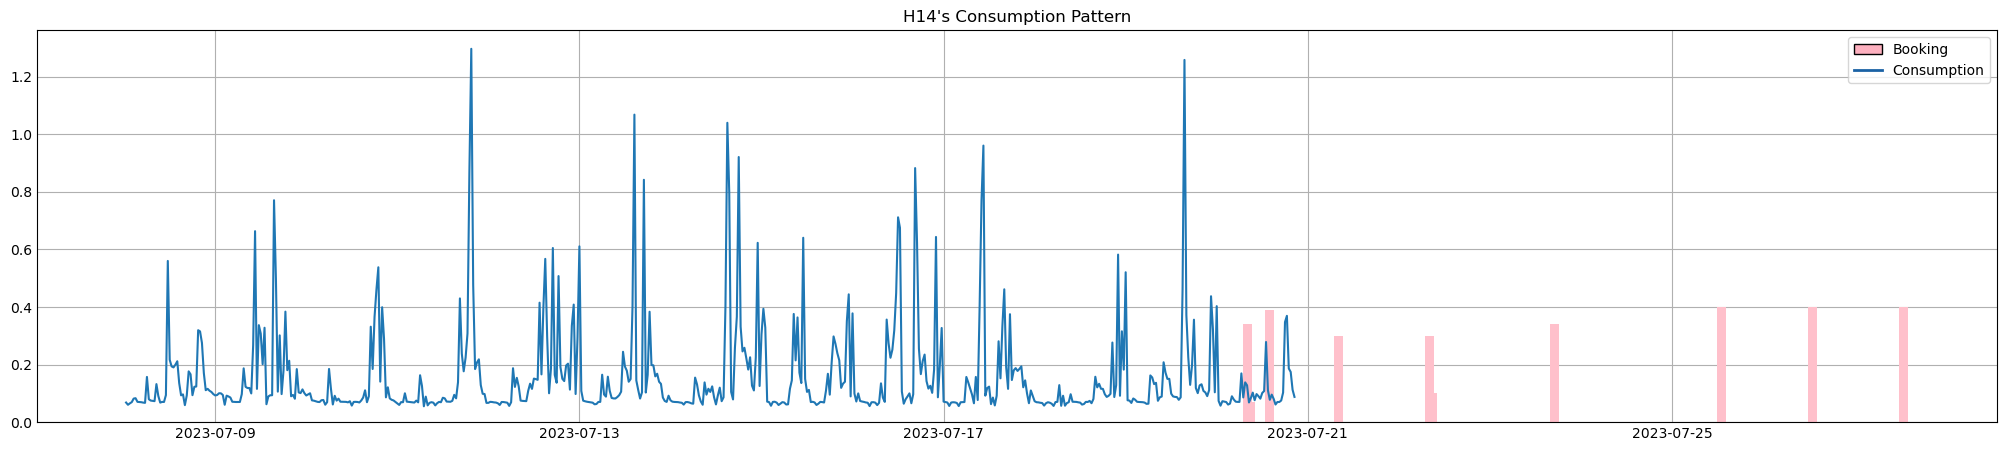

In [67]:
g4Bookings = g4Bookings.sort_values(by='start')
bookings114Zana = g4Bookings.loc[g4Bookings['user']==28] 
fig1, ax = plt.subplots( figsize=(20, 4))
ax.bar(bookings114Zana['start'],bookings114Zana['consumption'],color='pink',width=0.1)
ax.plot(consumption114Zana_coordination['time'],consumption114Zana_coordination['value'])

ax.set_title("H14's Consumption Pattern")
handles = [Rectangle((0, 0), 1, 1, color="#fdb0bf", ec="k"),
           Line2D([0, 1], [0.5, 0.5], color="#1b62a5", lw=2)]
labels = ["Booking", "Consumption"]
plt.legend(handles, labels)

plt.savefig('H14_consumption.png', dpi=300, bbox_inches='tight')
plt.show()